In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0
...,...,...,...,...,...,...,...,...,...,...
8528,Air India,09-03-2019,Delhi,Cochin,22:00,10-03-2021 19:15,21h 15m,2 stops,No info,16373.0
8529,Vistara,27-05-2019,Banglore,Delhi,17:00,19:35,2h 35m,non-stop,No info,4878.0
8530,Vistara,24-03-2019,Chennai,Kolkata,07:05,09:20,2h 15m,non-stop,No info,4842.0
8531,Air India,09-03-2019,Delhi,Cochin,04:00,10-03-2021 07:40,27h 40m,1 stop,No info,10315.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8533 non-null   object 
 1   Date_of_Journey  8533 non-null   object 
 2   Source           8533 non-null   object 
 3   Destination      8533 non-null   object 
 4   Dep_Time         8533 non-null   object 
 5   Arrival_Time     8533 non-null   object 
 6   Duration         8533 non-null   object 
 7   Total_Stops      8533 non-null   object 
 8   Additional_Info  8533 non-null   object 
 9   Price            8533 non-null   float64
dtypes: float64(1), object(9)
memory usage: 366.7+ KB


In [5]:
df.Additional_Info.value_counts()

No info                         6684
In-flight meal not included     1575
No check-in baggage included     249
1 Long layover                    15
Change airports                    5
No Info                            2
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [6]:
df.Source.value_counts()

Delhi       3619
Kolkata     2291
Banglore    1748
Mumbai       566
Chennai      309
Name: Source, dtype: int64

In [7]:
df.Destination.value_counts()

Cochin       3619
Banglore     2291
Delhi        1018
New Delhi     730
Hyderabad     566
Kolkata       309
Name: Destination, dtype: int64

In [8]:
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d-%m-%Y").dt.day

In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0,9
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0,3
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0,9
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0,27
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0,6
...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,09-03-2019,Delhi,Cochin,22:00,10-03-2021 19:15,21h 15m,2 stops,No info,16373.0,9
8529,Vistara,27-05-2019,Banglore,Delhi,17:00,19:35,2h 35m,non-stop,No info,4878.0,27
8530,Vistara,24-03-2019,Chennai,Kolkata,07:05,09:20,2h 15m,non-stop,No info,4842.0,24
8531,Air India,09-03-2019,Delhi,Cochin,04:00,10-03-2021 07:40,27h 40m,1 stop,No info,10315.0,9


In [10]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d-%m-%Y").dt.month

In [11]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [12]:

df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Dropping the Dep_Time column from the data

df.drop(["Dep_Time"], axis = 1, inplace=True)

In [13]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min
0,IndiGo,Banglore,Delhi,06:50,2h 50m,non-stop,No info,3943.0,9,4,4,0
1,IndiGo,Banglore,Delhi,11:20,2h 50m,non-stop,No info,4823.0,3,6,8,30
2,Jet Airways,Mumbai,Hyderabad,21:05,1h 30m,non-stop,In-flight meal not included,3210.0,9,6,19,35
3,Multiple carriers,Delhi,Cochin,21:00,8h 10m,1 stop,No info,7005.0,27,5,12,50
4,Air India,Delhi,Cochin,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0,6,6,6,50
...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,10-03-2021 19:15,21h 15m,2 stops,No info,16373.0,9,3,22,0
8529,Vistara,Banglore,Delhi,19:35,2h 35m,non-stop,No info,4878.0,27,5,17,0
8530,Vistara,Chennai,Kolkata,09:20,2h 15m,non-stop,No info,4842.0,24,3,7,5
8531,Air India,Delhi,Cochin,10-03-2021 07:40,27h 40m,1 stop,No info,10315.0,9,3,4,0


In [14]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Dropping the Arrival_Time column

df.drop(["Arrival_Time"], axis = 1, inplace=True)

In [15]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3943.0,9,4,4,0,6,50
1,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,4823.0,3,6,8,30,11,20
2,Jet Airways,Mumbai,Hyderabad,1h 30m,non-stop,In-flight meal not included,3210.0,9,6,19,35,21,5
3,Multiple carriers,Delhi,Cochin,8h 10m,1 stop,No info,7005.0,27,5,12,50,21,0
4,Air India,Delhi,Cochin,24h 50m,2 stops,No info,13381.0,6,6,6,50,7,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,21h 15m,2 stops,No info,16373.0,9,3,22,0,19,15
8529,Vistara,Banglore,Delhi,2h 35m,non-stop,No info,4878.0,27,5,17,0,19,35
8530,Vistara,Chennai,Kolkata,2h 15m,non-stop,No info,4842.0,24,3,7,5,9,20
8531,Air India,Delhi,Cochin,27h 40m,1 stop,No info,10315.0,9,3,4,0,7,40


In [16]:
# Assigning and converting Duration Column into list
duration = list(df["Duration"])
duration

['2h 50m',
 '2h 50m',
 '1h 30m',
 '8h 10m',
 '24h 50m',
 '2h 20m',
 '2h 15m',
 '10h 40m',
 '20h 10m',
 '2h 55m',
 '2h 55m',
 '2h 35m',
 '2h 35m',
 '11h 15m',
 '2h 20m',
 '2h 50m',
 '2h 45m',
 '12h 55m',
 '2h 55m',
 '11h 45m',
 '11h 25m',
 '5h 45m',
 '25h 20m',
 '5h 40m',
 '12h 30m',
 '13h 25m',
 '7h 40m',
 '3h',
 '10h 5m',
 '7h 15m',
 '5h 15m',
 '14h 15m',
 '2h 45m',
 '15h 30m',
 '8h 55m',
 '2h 50m',
 '11h 40m',
 '25h 50m',
 '7h 30m',
 '18h 20m',
 '1h 30m',
 '7h 45m',
 '6h',
 '2h 35m',
 '8h 30m',
 '1h 25m',
 '11h 30m',
 '8h 10m',
 '2h 15m',
 '8h 25m',
 '2h 55m',
 '11h',
 '2h 40m',
 '5h 45m',
 '6h 55m',
 '1h 25m',
 '15h 50m',
 '3h 15m',
 '21h 5m',
 '7h 5m',
 '17h 15m',
 '7h 5m',
 '2h 30m',
 '4h 25m',
 '21h 5m',
 '9h 50m',
 '2h 25m',
 '3h',
 '8h 35m',
 '2h 35m',
 '24h',
 '13h 30m',
 '19h 25m',
 '2h 30m',
 '2h 45m',
 '2h 55m',
 '10h 20m',
 '25h 35m',
 '2h 55m',
 '3h 15m',
 '9h 15m',
 '24h 40m',
 '27h 40m',
 '17h 25m',
 '6h 5m',
 '2h 55m',
 '22h 45m',
 '2h 50m',
 '2h 40m',
 '13h 20m',
 '2h

In [17]:

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # to check whether it contains the both hour and minutes
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # If duration is having hour only adding the minute value
        else:
            duration[i] = "0h " + duration[i]     # If duration is having minute only adding the hour value
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [18]:
# Adding the Duration Hours and Duration Mins Columns in the Datasets

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [19]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3943.0,9,4,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,4823.0,3,6,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,1h 30m,non-stop,In-flight meal not included,3210.0,9,6,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,8h 10m,1 stop,No info,7005.0,27,5,12,50,21,0,8,10
4,Air India,Delhi,Cochin,24h 50m,2 stops,No info,13381.0,6,6,6,50,7,40,24,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,21h 15m,2 stops,No info,16373.0,9,3,22,0,19,15,21,15
8529,Vistara,Banglore,Delhi,2h 35m,non-stop,No info,4878.0,27,5,17,0,19,35,2,35
8530,Vistara,Chennai,Kolkata,2h 15m,non-stop,No info,4842.0,24,3,7,5,9,20,2,15
8531,Air India,Delhi,Cochin,27h 40m,1 stop,No info,10315.0,9,3,4,0,7,40,27,40


In [20]:
df.drop(["Duration"], axis = 1, inplace = True)

# Handling Categorical Data

In [21]:
df["Airline"].value_counts()

Jet Airways          3073
IndiGo               1641
Air India            1401
Multiple carriers     953
SpiceJet              654
Vistara               384
Air Asia              256
GoAir                 157
OTHERS                 14
Name: Airline, dtype: int64

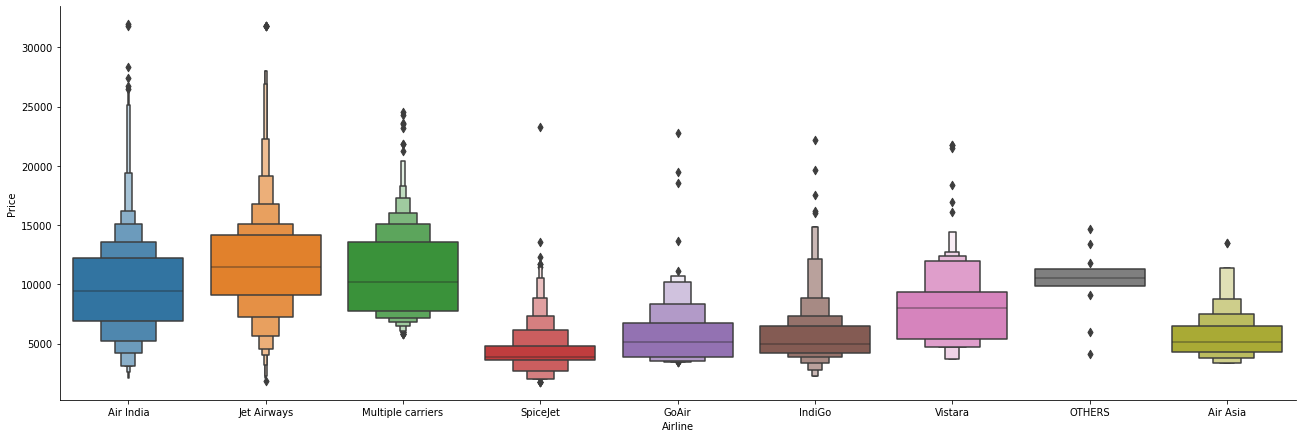

In [22]:
sns.catplot(y="Price", x="Airline", data=df.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)

In [23]:
# Since Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0


In [24]:
print(df["Source"].nunique())
print(df["Source"].unique())

5
['Banglore' 'Mumbai' 'Delhi' 'Chennai' 'Kolkata']


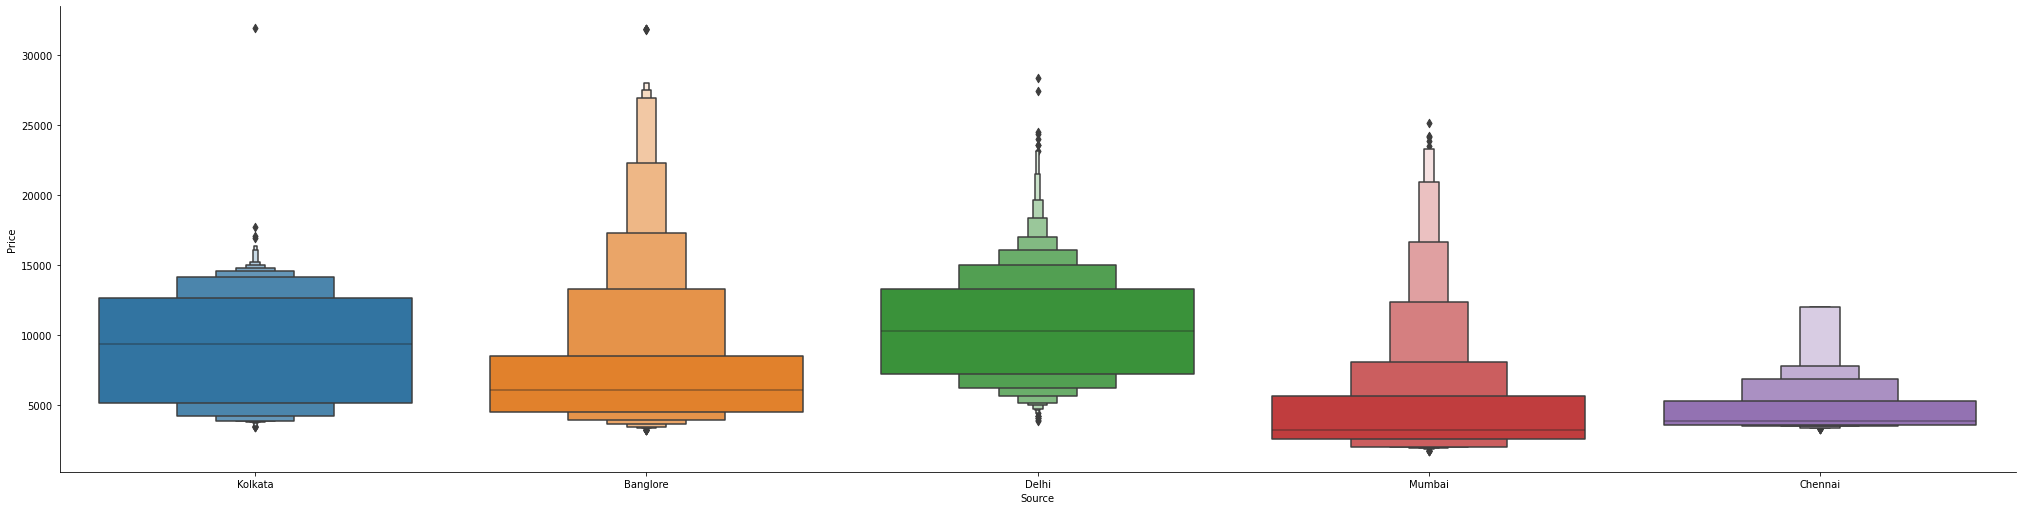

In [25]:

sns.catplot(y="Price", x="Source", data=df.sort_values("Price", ascending=False), kind="boxen", height=7, aspect = 4 )

In [26]:
# Since Source is also Numerical we will do OneHotEncodding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [27]:
df["Destination"].value_counts()

Cochin       3619
Banglore     2291
Delhi        1018
New Delhi     730
Hyderabad     566
Kolkata       309
Name: Destination, dtype: int64

In [28]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [29]:
df["Additional_Info"].value_counts()

No info                         6684
In-flight meal not included     1575
No check-in baggage included     249
1 Long layover                    15
Change airports                    5
No Info                            2
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [30]:
# Getting the percentage of "No Info" values in the "Additional_Info" column
(df["Additional_Info"] == "No info").value_counts()/(df.shape[0])

True     0.783312
False    0.216688
Name: Additional_Info, dtype: float64

In [31]:
df["Total_Stops"].value_counts()

1 stop          4490
non-stop        2793
2 stops         1214
3 or 4 stops      36
Name: Total_Stops, dtype: int64

In [32]:
# Since the "Total_Stops" column is ordinal we will use LabelEncoder

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

In [33]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,No info,3943.0,9,4,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,0,No info,4823.0,3,6,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,0,In-flight meal not included,3210.0,9,6,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1,No info,7005.0,27,5,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2,No info,13381.0,6,6,6,50,7,40,24,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,2,No info,16373.0,9,3,22,0,19,15,21,15
8529,Vistara,Banglore,Delhi,0,No info,4878.0,27,5,17,0,19,35,2,35
8530,Vistara,Chennai,Kolkata,0,No info,4842.0,24,3,7,5,9,20,2,15
8531,Air India,Delhi,Cochin,1,No info,10315.0,9,3,4,0,7,40,27,40


In [34]:
data_train = pd.concat([df, Airline, Source, Destination], axis = 1)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data_train["Additional_Info"] = ord_enc.fit_transform(data_train[["Additional_Info"]])

In [36]:
df.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)

In [37]:
data_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,Delhi,0,7.0,3943.0,9,4,4,0,...,0,0,0,0,0,0,1,0,0,0
1,IndiGo,Banglore,Delhi,0,7.0,4823.0,3,6,8,30,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Mumbai,Hyderabad,0,4.0,3210.0,9,6,19,35,...,0,0,0,0,1,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,1,7.0,7005.0,27,5,12,50,...,0,0,1,0,0,1,0,0,0,0
4,Air India,Delhi,Cochin,2,7.0,13381.0,6,6,6,50,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,2,7.0,16373.0,9,3,22,0,...,0,0,1,0,0,1,0,0,0,0
8529,Vistara,Banglore,Delhi,0,7.0,4878.0,27,5,17,0,...,1,0,0,0,0,0,1,0,0,0
8530,Vistara,Chennai,Kolkata,0,7.0,4842.0,24,3,7,5,...,1,1,0,0,0,0,0,0,1,0
8531,Air India,Delhi,Cochin,1,7.0,10315.0,9,3,4,0,...,0,0,1,0,0,1,0,0,0,0


In [38]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [39]:
data_train

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,7.0,3943.0,9,4,4,0,6,50,2,...,0,0,0,0,0,0,1,0,0,0
1,0,7.0,4823.0,3,6,8,30,11,20,2,...,0,0,0,0,0,0,1,0,0,0
2,0,4.0,3210.0,9,6,19,35,21,5,1,...,0,0,0,0,1,0,0,1,0,0
3,1,7.0,7005.0,27,5,12,50,21,0,8,...,0,0,1,0,0,1,0,0,0,0
4,2,7.0,13381.0,6,6,6,50,7,40,24,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,2,7.0,16373.0,9,3,22,0,19,15,21,...,0,0,1,0,0,1,0,0,0,0
8529,0,7.0,4878.0,27,5,17,0,19,35,2,...,1,0,0,0,0,0,1,0,0,0
8530,0,7.0,4842.0,24,3,7,5,9,20,2,...,1,1,0,0,0,0,0,0,1,0
8531,1,7.0,10315.0,9,3,4,0,7,40,27,...,0,0,1,0,0,1,0,0,0,0


In [40]:
test_data=pd.read_csv('test.csv')


In [41]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info


In [42]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d-%m-%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d-%m-%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)


# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)


# Additional_Info contains
#almost 80% no_info
#data_test.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)
ord_enc = OrdinalEncoder()
data_test["Additional_Info"] = ord_enc.fit_transform(data_test[["Additional_Info"]])

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2134 non-null   object
 1   Date_of_Journey  2134 non-null   object
 2   Source           2134 non-null   object
 3   Destination      2134 non-null   object
 4   Dep_Time         2134 non-null   object
 5   Arrival_Time     2134 non-null   object
 6   Duration         2134 non-null   object
 7   Total_Stops      2134 non-null   object
 8   Additional_Info  2134 non-null   object
dtypes: object(9)
memory usage: 75.1+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Ad

In [43]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [44]:
data_test.columns

Index(['Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [45]:
data_test

,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6.0,12,5,15,5,20,20,5,15,...,0,0,0,1,0,0,0,0,0,0
1,0,6.0,15,3,18,5,21,10,3,5,...,0,0,1,0,0,1,0,0,0,0
2,2,6.0,24,6,11,45,4,25,16,40,...,0,0,1,0,0,1,0,0,0,0
3,0,6.0,21,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0
4,0,6.0,27,4,14,25,16,55,2,30,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,0,6.0,6,4,17,0,19,45,2,45,...,0,0,0,0,0,0,1,0,0,0
2130,1,6.0,1,4,6,30,20,45,14,15,...,0,0,0,1,0,0,0,0,0,0
2131,1,6.0,15,5,8,45,19,0,10,15,...,0,0,1,0,0,1,0,0,0,0
2132,2,6.0,3,3,21,30,19,15,21,45,...,0,0,1,0,0,1,0,0,0,0


# Feature Selection

In [46]:
data_train.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Hour', 'Dep_min', 'Arrival_Hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_OTHERS', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [47]:
X = data_train.loc[:,['Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_OTHERS',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'] ]
X.head()

,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,7.0,9,4,4,0,6,50,2,50,...,0,0,0,0,0,0,1,0,0,0
1,0,7.0,3,6,8,30,11,20,2,50,...,0,0,0,0,0,0,1,0,0,0
2,0,4.0,9,6,19,35,21,5,1,30,...,0,0,0,0,1,0,0,1,0,0
3,1,7.0,27,5,12,50,21,0,8,10,...,0,0,1,0,0,1,0,0,0,0
4,2,7.0,6,6,6,50,7,40,24,50,...,0,0,1,0,0,1,0,0,0,0


In [48]:
y = data_train.iloc[:, 2]
y.head()

0     3943.0
1     4823.0
2     3210.0
3     7005.0
4    13381.0
Name: Price, dtype: float64

<AxesSubplot:>

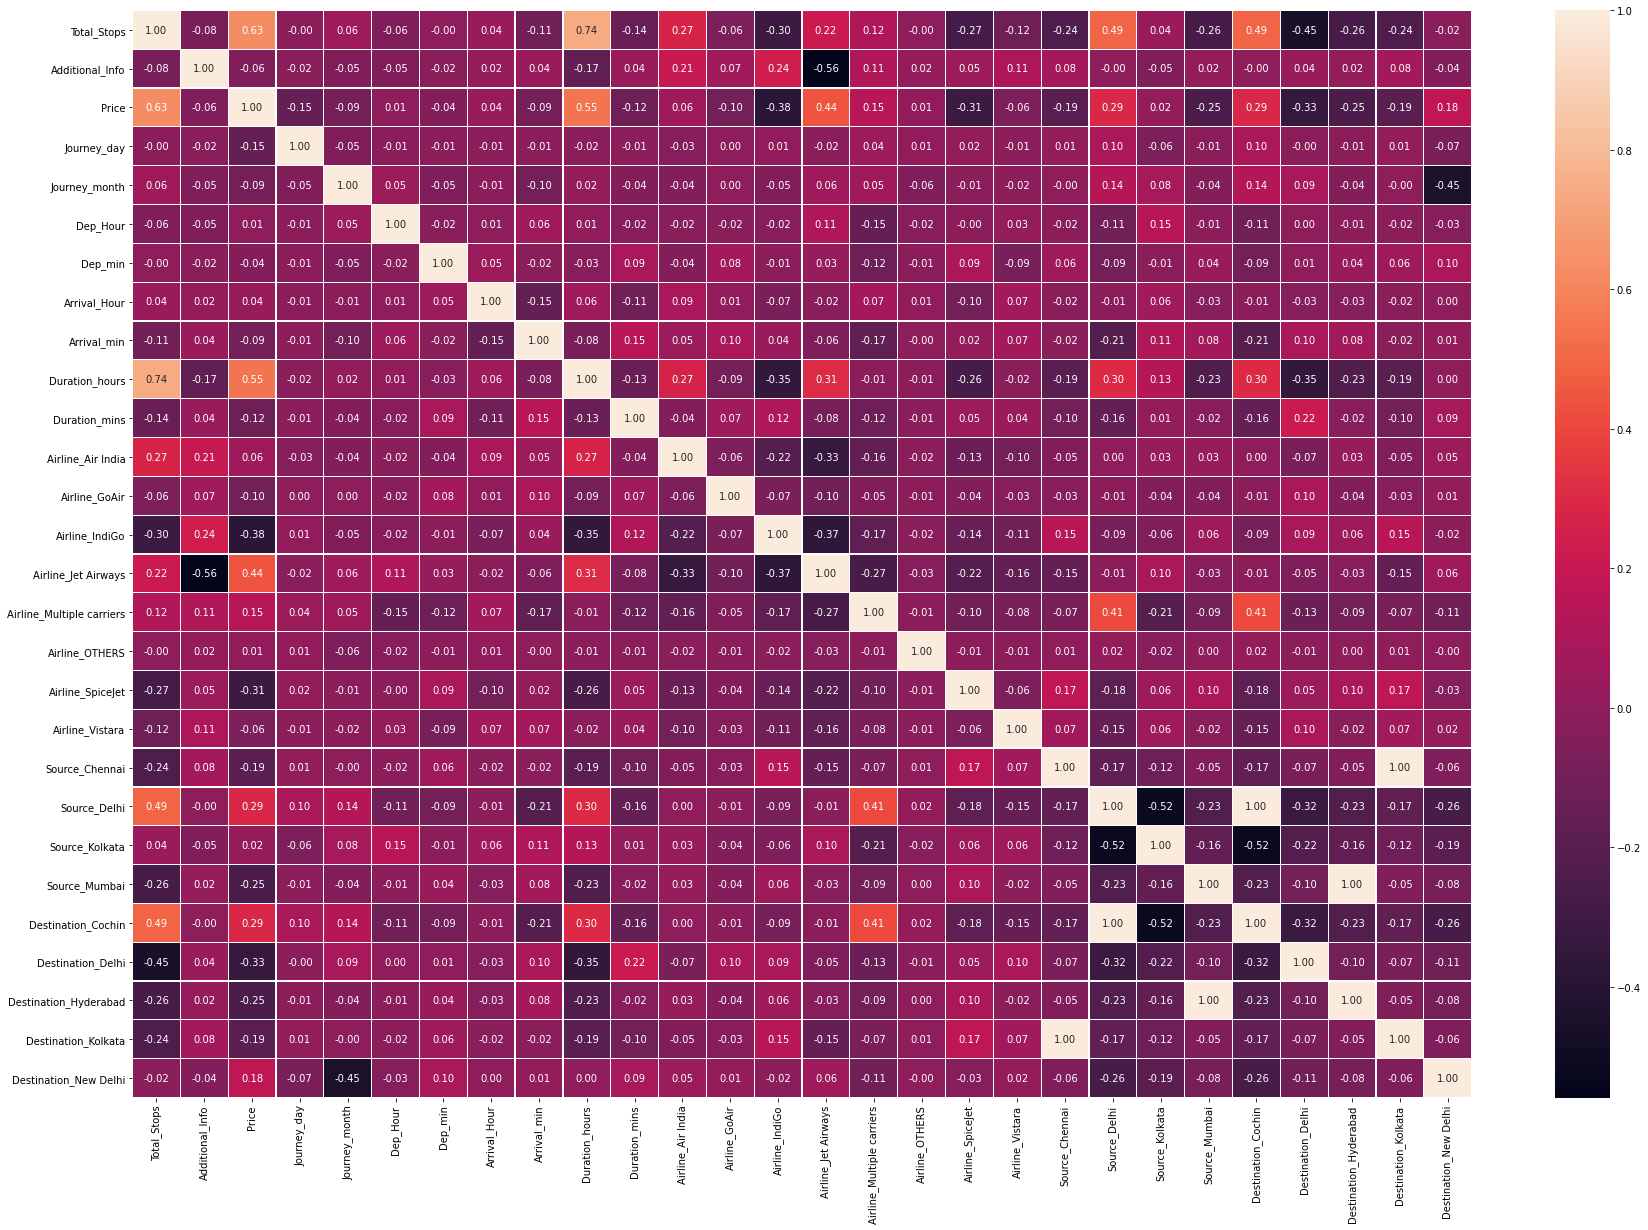

In [49]:
import matplotlib.pyplot as plt

corr = data_train[data_train.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [50]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [51]:
print(selection.feature_importances_)

[0.27031045 0.10022088 0.09784875 0.0534805  0.0194512  0.02032954
 0.01764169 0.01457366 0.10846816 0.01326475 0.01055286 0.00184022
 0.01174957 0.1478423  0.02383395 0.0011849  0.00245839 0.00642875
 0.00046805 0.00948047 0.0039645  0.00718716 0.01203195 0.01267126
 0.00692773 0.0004666  0.02532175]


<AxesSubplot:>

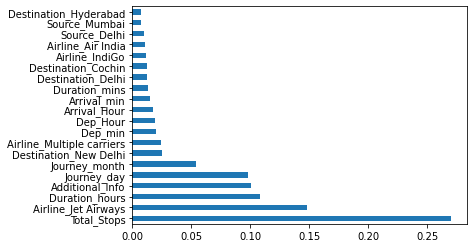

In [52]:
#plot graph of feature importances for better visualization


feat_importances = pd.Series(selection.feature_importances_, index = X.columns)

feat_importances.nlargest(20).plot(kind="barh")


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = reg_rf.predict(X_test)

In [56]:
reg_rf.score(X_train, y_train)

0.9843242571022535

In [57]:
reg_rf.score(X_test, y_test)

0.9200762643433141

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

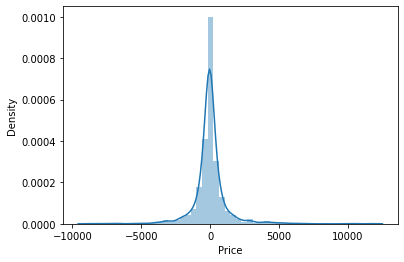

In [58]:
sns.distplot(y_test - y_pred)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

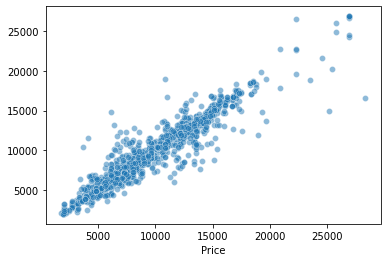

In [59]:

sns.scatterplot(y_test, y_pred, alpha = 0.5)


In [60]:
from sklearn import metrics
import numpy as np

In [61]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 646.6860900157741
MSE: 1504311.3562717973
RMSE: 1226.5037122943402


In [62]:
metrics.r2_score(y_test, y_pred)

0.9200762643433141

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [66]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [69]:
prediction = rf_random.predict(X_test)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

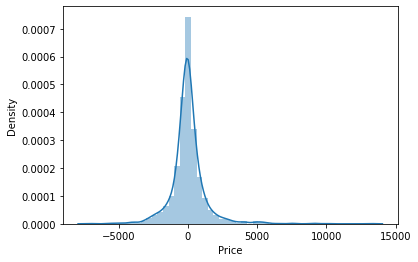

In [70]:
sns.distplot(y_test-prediction)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

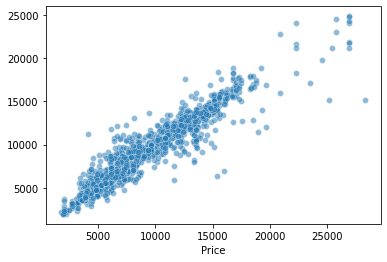

In [71]:
sns.scatterplot(y_test, prediction, alpha = 0.5)

In [72]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 759.6133250269338
MSE: 1695841.0782251467
RMSE: 1302.2446307146545


In [73]:
import pickle

# Open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# pickle.dump(reg_rf, file)

pickle.dump(rf_random, file)

In [74]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [75]:
y = pd.read_csv('Test.csv')

In [76]:
y

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info
...,...,...,...,...,...,...,...,...,...
2129,Air India,06-04-2019,Banglore,Delhi,17:00,19:45,2h 45m,non-stop,No info
2130,Jet Airways,01-04-2019,Kolkata,Banglore,06:30,20:45,14h 15m,1 stop,No info
2131,Multiple carriers,15-05-2019,Delhi,Cochin,08:45,19:00,10h 15m,1 stop,No info
2132,Air India,03-03-2019,Delhi,Cochin,21:30,04-03-2021 19:15,21h 45m,2 stops,No info


In [77]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(y.info())

print()
print()

print("Null values :")
print("-"*75)
y.dropna(inplace = True)
print(y.isnull().sum())

# EDA

# Date_of_Journey
y["Journey_day"] = pd.to_datetime(y.Date_of_Journey, format="%d-%m-%Y").dt.day
y["Journey_month"] = pd.to_datetime(y["Date_of_Journey"], format = "%d-%m-%Y").dt.month
y.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
y["Dep_hour"] = pd.to_datetime(y["Dep_Time"]).dt.hour
y["Dep_min"] = pd.to_datetime(y["Dep_Time"]).dt.minute
y.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
y["Arrival_hour"] = pd.to_datetime(y.Arrival_Time).dt.hour
y["Arrival_min"] = pd.to_datetime(y.Arrival_Time).dt.minute
y.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(y["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
y["Duration_hours"] = duration_hours
y["Duration_mins"] = duration_mins
y.drop(["Duration"], axis = 1, inplace = True)

# Categorical data

print("Airline")
print("-"*75)
print(y["Airline"].value_counts())
Airline = pd.get_dummies(y["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(y["Source"].value_counts())
Source = pd.get_dummies(y["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(y["Destination"].value_counts())
Destination = pd.get_dummies(y["Destination"], drop_first = True)


# Replacing Total_Stops
y.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

# Concatenate dataframe --> y + Airline + Source + Destination
y = pd.concat([y, Airline, Source, Destination], axis = 1)


# Additional_Info contains
#almost 80% no_info
#data_test.drop(["Airline", "Source", "Destination", "Additional_Info"], axis = 1, inplace = True)
ord_enc = OrdinalEncoder()
y["Additional_Info"] = ord_enc.fit_transform(y[["Additional_Info"]])

print()
print()

print("Shape of test data : ", y.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2134 non-null   object
 1   Date_of_Journey  2134 non-null   object
 2   Source           2134 non-null   object
 3   Destination      2134 non-null   object
 4   Dep_Time         2134 non-null   object
 5   Arrival_Time     2134 non-null   object
 6   Duration         2134 non-null   object
 7   Total_Stops      2134 non-null   object
 8   Additional_Info  2134 non-null   object
dtypes: object(9)
memory usage: 75.1+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Ad

In [78]:
y['Total_Stops'].value_counts()

1    1124
0     698
2     302
3      10
Name: Total_Stops, dtype: int64

In [79]:
y

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,SpiceJet,Kolkata,Banglore,1,6.0,12,5,15,5,20,...,0,0,0,1,0,0,0,0,0,0
1,Air India,Delhi,Cochin,0,6.0,15,3,18,5,21,...,0,0,1,0,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,6.0,24,6,11,45,4,...,0,0,1,0,0,1,0,0,0,0
3,SpiceJet,Kolkata,Banglore,0,6.0,21,6,9,0,11,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Kolkata,Banglore,0,6.0,27,4,14,25,16,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,Air India,Banglore,Delhi,0,6.0,6,4,17,0,19,...,0,0,0,0,0,0,1,0,0,0
2130,Jet Airways,Kolkata,Banglore,1,6.0,1,4,6,30,20,...,0,0,0,1,0,0,0,0,0,0
2131,Multiple carriers,Delhi,Cochin,1,6.0,15,5,8,45,19,...,0,0,1,0,0,1,0,0,0,0
2132,Air India,Delhi,Cochin,2,6.0,3,3,21,30,19,...,0,0,1,0,0,1,0,0,0,0


In [80]:
y.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [81]:
y.columns

Index(['Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [82]:
test_res =  rf_random.predict(y)

In [84]:
len(test_res)

2134

In [85]:
test_res

array([ 5169.428     ,  5429.625     , 13504.26585   , ...,
        9764.31092624, 13273.6110641 ,  6861.7304    ])

In [86]:
ss = pd.read_csv('Sample_Submission.csv')

In [125]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5 non-null      float64
dtypes: float64(1)
memory usage: 104.0 bytes


In [139]:
res = pd.DataFrame(test_res, columns=['Price'])

In [140]:
res.insert(0,'Id', range(0, len(test_res)))

In [142]:
res.to_csv('price.csv', index=False)

In [141]:
res

,Id,Price
0,0,5169.428000
1,1,5429.625000
2,2,13504.265850
3,3,3938.010000
4,4,4880.005000
...,...,...
2129,2129,5485.252000
2130,2130,12298.261000
2131,2131,9764.310926
2132,2132,13273.611064
